# Title         
<!--  -->     

**social media post analysis**        


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/users/prave/datasets/csv files/Live.csv')

## Exploring the dataset

In [3]:
print("shape of the dataset:{}".format(df.shape))

shape of the dataset:(7050, 16)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

**Note:** We got 4 unneccessary columns.we'll remove it.and There si no Null values in features

In [5]:
df=df.iloc[:,:-4]

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0


In [7]:
df.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

# Explorating data analysis and cleaning     

In [8]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [89]:
# splitting 'status_published' as separate date and time column
df['status_time']=pd.to_datetime(df['status_published']).dt.time
df['status_published']=pd.to_datetime(df['status_published']).dt.date
df['year']=pd.to_datetime(df['status_published']).dt.year

In [10]:
# converting timestmp.time to object to split the time into "hours"
df['status_time']=df['status_time'].astype(str)

In [11]:
df['status_time']=df['status_time'].apply(lambda x:x.split(":")[0])
df['status_time']=df['status_time'].astype(int)

In [12]:
# Creating a new feature of time to day:morning,evening,latenight,night
def time_of_day(n):
    if n in range(4,8):
        return "early morning"
    elif n in range(8,12):
        return "morning"
    elif n in range(12,17):
        return 'afternoon'
    elif n in range(17,20):
        return 'evening'
    elif n in range(20,25) or n==0:
        return 'night'
    elif n in range(1,4):
        return 'late night'
df['type_of_day']=df['status_time'].apply(lambda x:time_of_day(x))

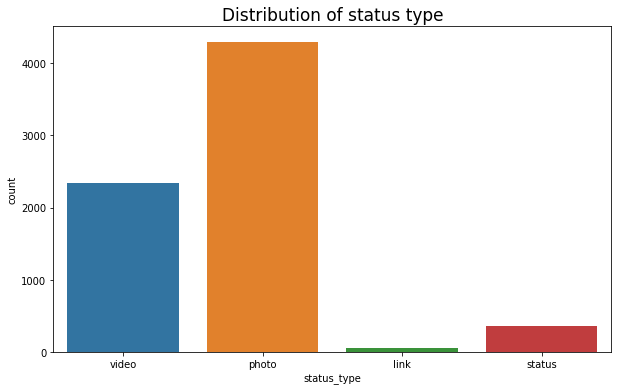

In [22]:
plt.figure(figsize=[10,6])
plt.title("Distribution of status type",fontsize=17)
sns.countplot(df['status_type'])
plt.show()

**Note:**     
* In our dataset **link and status** are have very less datapoint.so, i will focus on **Videos and photos** status type only    
* Remove **link and status** data points

In [40]:
df=df[(df['status_type']!='link') & (df['status_type']!='status')]

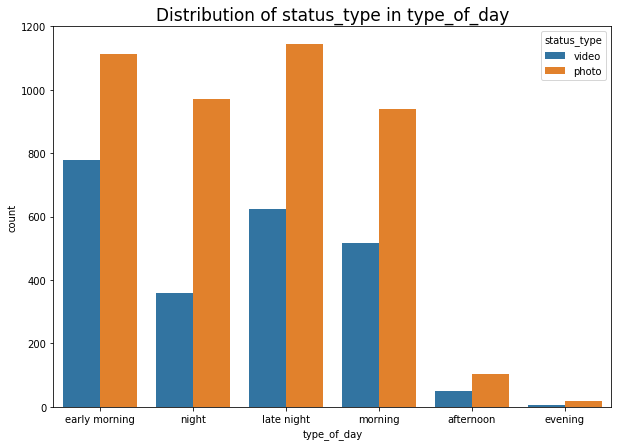

In [41]:
plt.figure(figsize=[10,7])
plt.title('Distribution of status_type in type_of_day',fontsize=17)
sns.countplot(x='type_of_day',hue='status_type',data=df)
plt.show()

**Insight:** 
* Most  of the **videos** are uploading at **early morning(4 to 7 AM)**  
* Most of the **Photos** are uploading at **late night(1 to 4 AM)**       
* **evening(17 to 20 PM)** is the leat of uploading **both photos and videos**

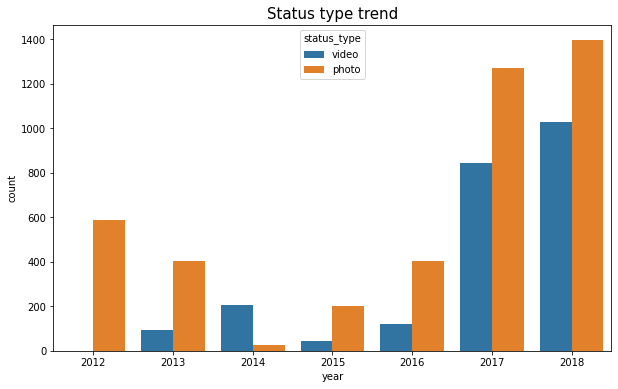

In [91]:
plt.figure(figsize=(10,6))
sns.countplot(x='year',hue='status_type',data=df)
plt.title('Status type trend',fontsize=15)
plt.show()

In [42]:
def barchart(feature,title):
    video=df[df['status_type']=='video'][feature].mean()
    photos=df[df['status_type']=='photo'][feature].mean()
    temp_data=pd.DataFrame([video,photos])
    temp_data.index=['video','photos']
    temp_data.plot(kind='bar',stacked=True,figsize=(10,6))
    plt.title(title,fontsize=16)

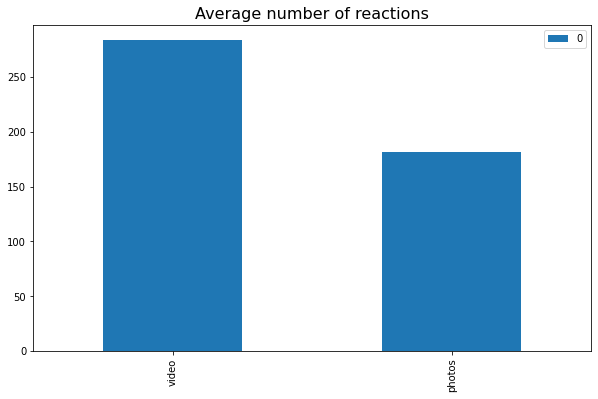

In [50]:
barchart('num_reactions','Average number of reactions')

**Insight:**           
* The average number of reactions on **videos** ia **appx. 280**   
* The average number of reactions on **photos** is **appx. 170**        

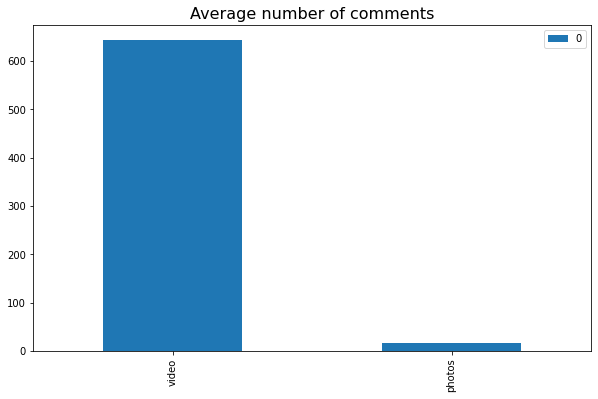

In [49]:
barchart('num_comments','Average number of comments')

**Insigh:**         
* **video** status type is highly dominating in comments.compared to **photos**       

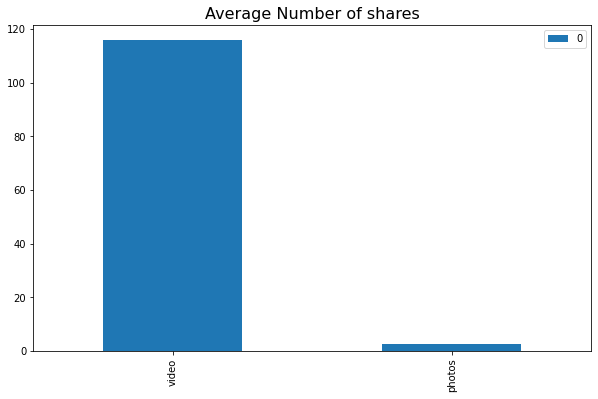

In [48]:
barchart('num_shares','Average Number of shares')

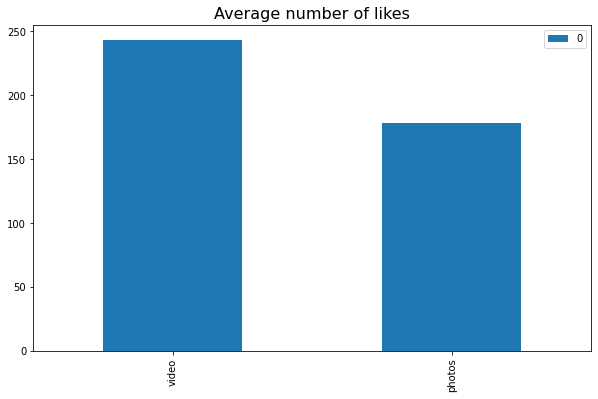

In [47]:
barchart('num_likes','Average number of likes')

**Insight:**        
* **videos** are getting more likes,compared to **photos**

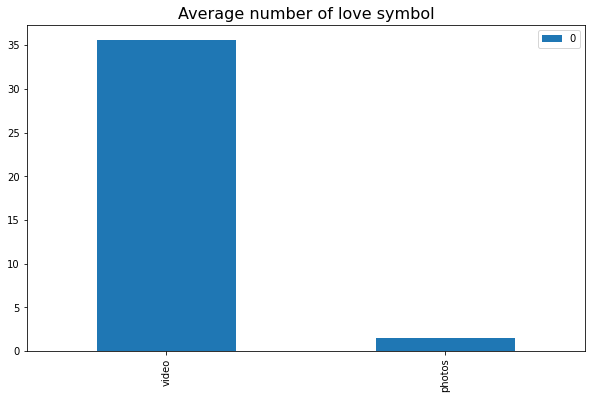

In [51]:
barchart('num_loves','Average number of love symbol')

In [92]:
df.head(3)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_time,day_of_week,type_of_day,year
0,246675545449582_1649696485147474,video,2018-04-22,529,512,262,432,92,3,1,1,0,00:00:00,6,early morning,2018
1,246675545449582_1649426988507757,photo,2018-04-21,150,0,0,150,0,0,0,0,0,00:00:00,5,night,2018
2,246675545449582_1648730588577397,video,2018-04-21,227,236,57,204,21,1,1,0,0,00:00:00,5,early morning,2018


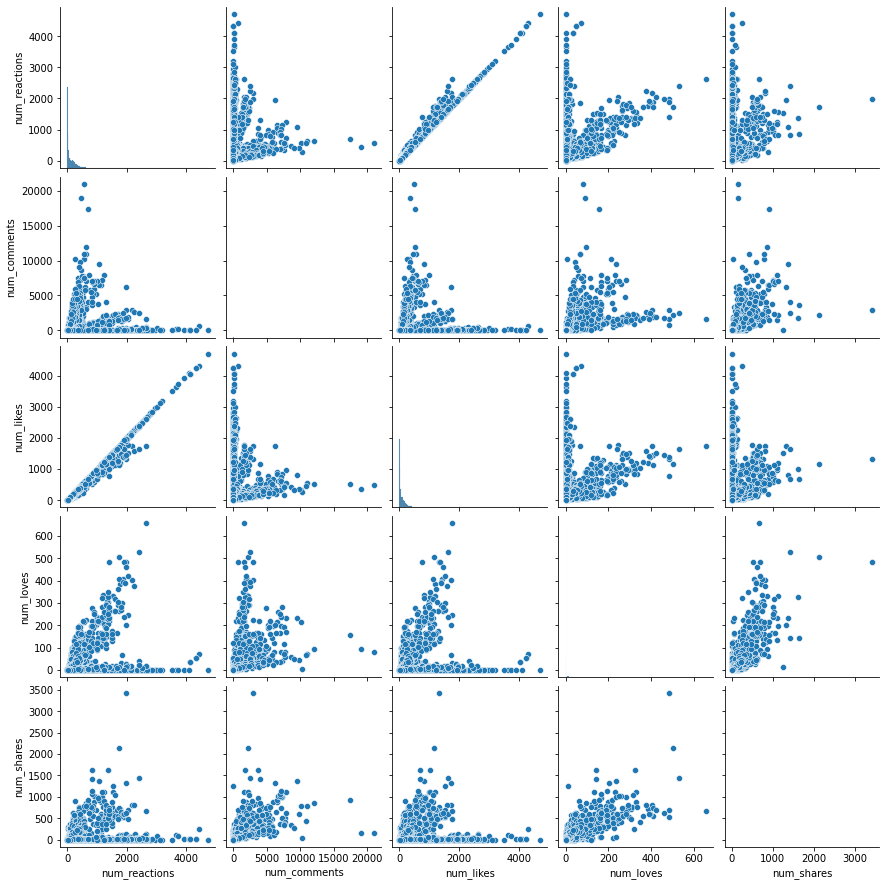

In [88]:
sns.pairplot(df[['num_reactions','num_comments','num_likes','num_loves','num_shares']])

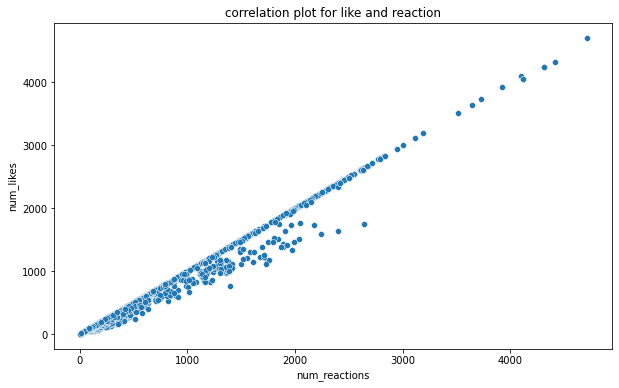

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='num_reactions',y='num_likes',data=df)
plt.title('correlation plot for likes and reactions')
plt.show()

**Insight:**       
* From the above,as number of reaction **increases** number of likes **increases**

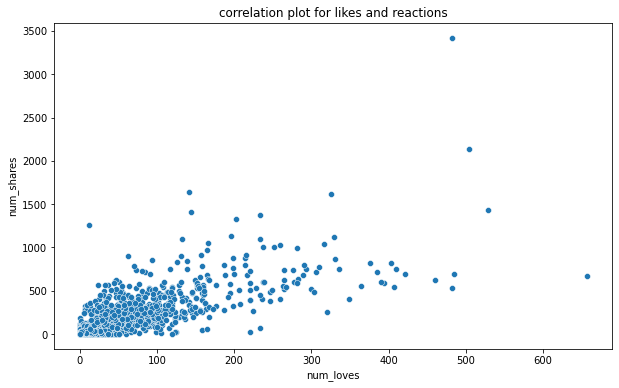

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='num_loves',y='num_shares',data=df)
plt.title('correlation plot for likes and reactions')
plt.show()

**Insight:**        
* Generally, if number of loves **increases** shares **increases**          
* but,in some cases number of loves **decreses** but number of shares **increases**.that means post is **could be aganist some community people,politician,celebrity and etc**

In [13]:
df.head(3)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_time,day_of_week,type_of_day
0,246675545449582_1649696485147474,video,2018-04-22,529,512,262,432,92,3,1,1,0,6,6,early morning
1,246675545449582_1649426988507757,photo,2018-04-21,150,0,0,150,0,0,0,0,0,22,5,night
2,246675545449582_1648730588577397,video,2018-04-21,227,236,57,204,21,1,1,0,0,6,5,early morning


# Conclusion              
<!--  -->             
* Most of the **photos and videos** are uploading in between **1 to 7 AM**         
* **video** status type is dominating in every factor(i.e. likes,comments,shares,loves,and etc).compared to **photo** status type             
* if number of reactions **increases** to your post, automatically likes **increases**    
* from **2106 to 2018** photos and videos uploadings are constantly increasing